# Import libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import stemgraphic
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pylab
import numpy as np

In [2]:
df=pd.read_excel(r'..\datasets\data.xlsx', sheet_name="normal_data")

In [3]:
df.head()

,data
0,36
1,37
2,38
3,38
4,39


In [4]:
df.shape

(100, 1)

In [5]:
data=df['data']

# Normal Distribution testing methods

## 1. Graphical methods

##### Stem plot

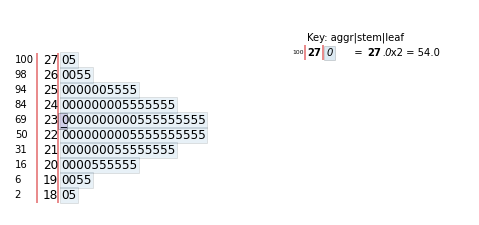

In [6]:
stemgraphic.stem_graphic(data, scale=2)
plt.show()

##### Histogram

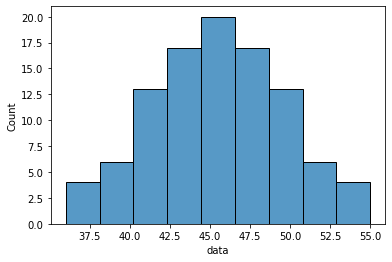

In [7]:
sns.histplot(data)
plt.show()

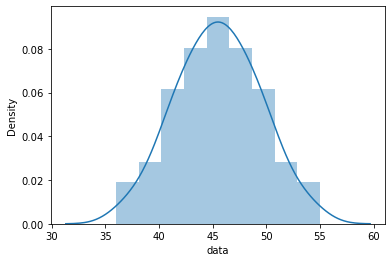

In [8]:
sns.distplot(data)
plt.show()

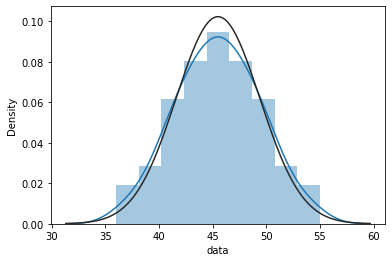

In [9]:
sns.distplot(data, fit=stats.norm)
plt.show()

##### qqplot

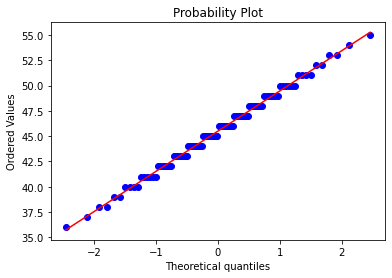

In [10]:
stats.probplot(data, dist='norm', plot=pylab)
pylab.show()

# Numerical (Non-parametric Test) methods

##### Shapiro Wilk test

In [11]:
print(stats.shapiro(data))

ShapiroResult(statistic=0.9928068518638611, pvalue=0.8761376142501831)


##### Jarque-Bera test

In [12]:
print(stats.jarque_bera(data))

Jarque_beraResult(statistic=0.4757183497700408, pvalue=0.7883136976444426)


According to the test results, since a is greater than 0.05, it is understood that there is a normal distribution.

# One sample t-test

If the data we have is greater than 120 or a normal distribution, we can apply the t test.

In [13]:
print(len(data))

100


The number of data is less than 120, but since it is a normal distribution, we can apply the t test.

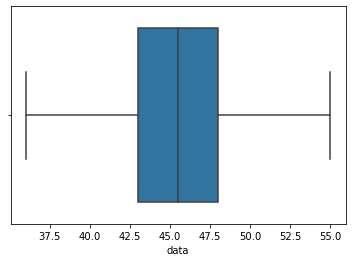

In [14]:
sns.boxplot(data)
plt.show()

H0 (null hypothesis): mu=60                                            
H1 (alternative hypotesis): mu!=60

In [15]:
t_statistic, p_value=stats.ttest_1samp(data, 60, alternative='two-sided')
print(f't statistic: {t_statistic}')

t_c=stats.t.ppf(q=1-.05/2,df=len(data)-1)
print(f't critic: {t_c}')

t statistic: -36.993122661656386
t critic: 1.9842169515086827


Since t_statictic value is less than t_c value, t_statictic belongs to a rejection region. In this case, H0 is rejected.

Since we reject H0, a is either greater than 60 or less.

H0 (null hypothesis): mu=60                                                                                            
H1 (alternative hypotesis): mu<60

In [16]:
t_statistic, p_value=stats.ttest_1samp(data, 60, alternative='less')
print(f't statistic: {t_statistic}')

t_c=stats.t.ppf(q=.05,df=len(data)-1)
print(f't critic: {t_c}')

t statistic: -36.993122661656386
t critic: -1.6603911559963902


Since t_statictic value is less than t_c value, t_statictic belongs to a rejection region. In this case, H0 is rejected. Since a is rejected, it appears that the mean is less than 60

## Confidence Interval

Confidence Interval = x  +/-  t*(s/√n)

In [17]:
confidence_interval = stats.t.interval( alpha=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data) )
print(confidence_interval)

(44.72225690272161, 46.27774309727839)


# Wilcoxon Rank Sum test

In [18]:
df=pd.read_excel(r'..\datasets\data.xlsx', sheet_name="sign_rank")

In [19]:
df.head()

,data
0,21
1,18
2,11
3,14
4,10


In [20]:
data=df['data']

In [21]:
print(len(data))

23


Since the number of data is less than 120, normality tests must be done.

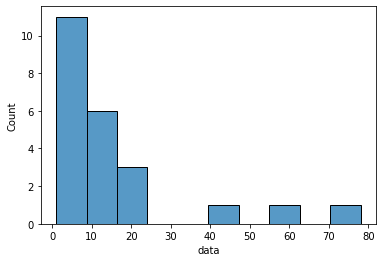

In [22]:
sns.histplot(data)
plt.show()

In [23]:
t_statistic, p_value=stats.shapiro(data)
print('p_value:', '%.3f'%p_value)

p_value: 0.000


In [24]:
t_statistic, p_value=stats.jarque_bera(data)
print('p_value:', '%.3f'%p_value)

p_value: 0.000


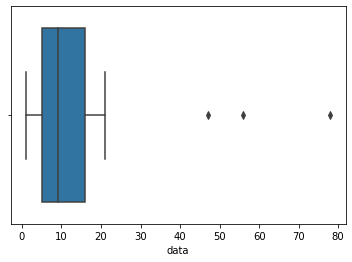

In [25]:
sns.boxplot(data)
plt.show()

Since a value is less than 0.05, the distribution is not a normal distribution. The data number is not more than 120, nor is it a normal distribution. That's why I can't use the t-test. That's why we use the Wilcoxon Rank Sum test. This time we are testing the median, not the mean. Because in data with high outliers, we were interested in the median, not the mean.

H0 (null hypothesis): mu=25                                            
H1 (alternative hypotesis): mu!=25

If alternative is “two-sided”, the sum of the ranks of the differences above or below zero, whichever is smaller. Otherwise the sum of the ranks of the differences above zero.

In [26]:
w, p = stats.wilcoxon(np.array(data)-25, alternative='two-sided')
print(w, p)

63.0 0.021372318267822266


H0 is rejected because p value is less than 0.05. Then the median is either greater than 25 or less. We set up a new hypothesis test.

H0 (null hypothesis): mu=25                                            
H1 (alternative hypotesis): mu<25

In [27]:
w, p = stats.wilcoxon(np.array(data)-25, alternative='less')
print(w, p)

63.0 0.010686159133911133


H0 is rejected because p value is less than 0.05. As can be understood then, the median is considered to be less than 25.

In [28]:
print('mean:', np.mean(data))
print('median:', np.median(data))

mean: 15.391304347826088
median: 9.0


Data with outliers does not have a confidence interval